In [1]:
import numpy as np
import cvxopt #Linear and Integer Programming Solver
import cvxopt.glpk
from cvxopt import matrix
import matplotlib.pyplot as plt

In [2]:
cvxopt.glpk.ilp?

In [3]:
#We have in total 88 binary variables
nbr_bricks = 22 #Defining number of bricks
nbr_SRs = 4 #Defining number of sales representatives
#The brick id goes from 1 to 22
#The sales representative id goes from 1 to 4

In [4]:
#Defining constant values
#Brick Index Value Array:
brick_index = np.array([0.1609, 0.1164, 0.1026, 0.1516, 0.0939, 0.1320, 0.0687, 0.0930, 0.2116, 0.2529, 0.0868, 0.0828, 0.0975, 0.8177, 0.4115, 0.3795, 0.0710, 0.0427, 0.1043, 0.0997, 0.1698, 0.2531])
#Travel Distance between SR offices and bricks Matrix:
distances = np.array([[16.16, 24.08, 24.32, 21.12] ,[19, 26.47, 27.24, 17.33] ,[25.29, 32.49, 33.42, 12.25] ,[0, 7.93, 8.31, 36.12] ,[3.07, 6.44, 7.56, 37.37] ,[1.22, 7.51, 8.19, 36.29] ,[2.8, 10.31, 10.95, 33.5] ,[2.87, 5.07, 5.67, 38.8] ,[3.8, 8.01, 7.41, 38.16] ,[12.35, 4.52, 4.35, 48.27] ,[11.11, 3.48, 2.97, 47.14] ,[21.99, 22.02, 24.07, 39.86] ,[8.82, 3.3, 5.36, 43.31] ,[7.93, 0, 2.07, 43.75] ,[9.34, 2.25, 1.11, 45.43] ,[8.31, 2.07, 0, 44.43] ,[7.31, 2.44, 1.11, 43.43] ,[7.55, 0.75, 1.53, 43.52] ,[11.13, 18.41, 19.26, 25.4] ,[17.49, 23.44, 24.76, 23.21] ,[11.03, 18.93, 19.28, 25.43] ,[36.12, 43.75, 44.43, 0]])

In [5]:
brick_index

array([0.1609, 0.1164, 0.1026, 0.1516, 0.0939, 0.132 , 0.0687, 0.093 ,
       0.2116, 0.2529, 0.0868, 0.0828, 0.0975, 0.8177, 0.4115, 0.3795,
       0.071 , 0.0427, 0.1043, 0.0997, 0.1698, 0.2531])

In [6]:
distances

array([[16.16, 24.08, 24.32, 21.12],
       [19.  , 26.47, 27.24, 17.33],
       [25.29, 32.49, 33.42, 12.25],
       [ 0.  ,  7.93,  8.31, 36.12],
       [ 3.07,  6.44,  7.56, 37.37],
       [ 1.22,  7.51,  8.19, 36.29],
       [ 2.8 , 10.31, 10.95, 33.5 ],
       [ 2.87,  5.07,  5.67, 38.8 ],
       [ 3.8 ,  8.01,  7.41, 38.16],
       [12.35,  4.52,  4.35, 48.27],
       [11.11,  3.48,  2.97, 47.14],
       [21.99, 22.02, 24.07, 39.86],
       [ 8.82,  3.3 ,  5.36, 43.31],
       [ 7.93,  0.  ,  2.07, 43.75],
       [ 9.34,  2.25,  1.11, 45.43],
       [ 8.31,  2.07,  0.  , 44.43],
       [ 7.31,  2.44,  1.11, 43.43],
       [ 7.55,  0.75,  1.53, 43.52],
       [11.13, 18.41, 19.26, 25.4 ],
       [17.49, 23.44, 24.76, 23.21],
       [11.03, 18.93, 19.28, 25.43],
       [36.12, 43.75, 44.43,  0.  ]])

In [7]:
#Creates a unique ID for each variable
def get_id(i,j):
    '''
    Associate a unique variable index given a 2-index (i,j) 
    '''
    assert(i>=0 and i<nbr_bricks)
    assert(j>=0 and j<nbr_SRs)
    
    return(4*i + j)

In [8]:
#Let's define the equality matrix
#We have in total 26 equality constraints
A = np.zeros((26,nbr_bricks*nbr_SRs))
A.shape
c=0 #Starting the constraint counter

In [9]:
#Defining sales representatives offices (center bricks)
for i in range(nbr_bricks):
    for j in range(nbr_SRs):
        #Define the office of Sales Representative 1 at brick 4
        if i+1==4 and j+1==1: 
            A[c,get_id(i,j)]=1
            c+=1
        #Define the office of Sales Representative 2 at brick 14
        if i+1==14 and j+1==2:
            A[c,get_id(i,j)]=1
            c+=1
        #Define the office of Sales Representative 3 at brick 16
        if i+1==16 and j+1==3:
            A[c,get_id(i,j)]=1
            c+=1
        #Define the office of Sales Representative 4 at brick 22
        if i+1==22 and j+1==4:
            A[c,get_id(i,j)]=1
            c+=1

In [10]:
#Now we add the constraint that each brick cannot be assign to more than 1 sales representative at a time
for i in range(nbr_bricks):
    for j in range(nbr_SRs):
        A[c,get_id(i,j)]=1 #Each brick can only be assigned to one SR at a time
    c+=1

In [11]:
A.shape

(26, 88)

In [12]:
#Now let's define the inequality matrix
#We have in total 8 inequality constraints
G = np.zeros((8,nbr_bricks*nbr_SRs))
G.shape
c=0 #Starting the constraint counter

In [13]:
#We also need to create the h array that will represent all values on the right-hand side of the inequalities
h=np.zeros(8)

In [14]:
#Defining the workload threshold [0.8-1.2]
workload_l = 0.8
workload_h = 1.2

In [15]:
#Defining workload upper limit
for j in range(nbr_SRs):
    for i in range(nbr_bricks):
        G[c,get_id(i,j)]=brick_index[i]
        h[c]=workload_h
    c+=1

#Defining workload lower limit    
for j in range(nbr_SRs):
    for i in range(nbr_bricks):
        G[c,get_id(i,j)]=-brick_index[i]
        h[c]=-workload_l
    c+=1        

In [16]:
G.shape

(8, 88)

In [17]:
#We initialize our distance travelled by SR'S
total_distance = np.zeros(nbr_bricks*nbr_SRs)

#Defining the distance objective
for i in range(nbr_bricks):
    for j in range(nbr_SRs):
        total_distance[get_id(i,j)] = distances[i][j]

In [18]:
#Initializing disruption matrix
total_disruption = np.zeros(nbr_bricks*nbr_SRs)

#Defining the disruption objective
for i in range(nbr_bricks):
    for j in range(nbr_SRs):
        if (i+1==1 and j+1==4) or (i+1==2 and j+1==4) or (i+1==3 and j+1==4) or (i+1==5 and j+1==1) or (i+1==6 and j+1==1) \
        or (i+1==7 and j+1==1) or (i+1==8 and j+1==1) or (i+1==9 and j+1==3) or (i+1==10 and j+1==2) or (i+1==11 and j+1==2) \
        or (i+1==12 and j+1==2) or (i+1==13 and j+1==2) or (i+1==15 and j+1==1) or (i+1==17 and j+1==3) \
        or (i+1==18 and j+1==3) or (i+1==19 and j+1==4) or (i+1==20 and j+1==4) or (i+1==21 and j+1==4):
            total_disruption[get_id(i,j)]=-brick_index[i]

In [19]:
#We will first minimize the total disruption and then start adding the total distance as a new constraint in order to implement the epsilon-constraint algorithm

Aeq = matrix(A)
b=matrix(np.ones(A.shape[0]))
G=matrix(G)
h=matrix(h)
cost_disrup=matrix(total_disruption) #total disruption as cost function
cost_distance = matrix(total_distance) #distance objective
B=set(range(A.shape[1])) #Set of binary variables
#We use a factor of 0.00001 in order to remove weekly non-dominated solutions
(status, solution) = cvxopt.glpk.ilp(c=cost_disrup+0.00001*cost_distance,G=G,h=h,A=Aeq,b=b,B=B)

In [20]:
status

'optimal'

In [21]:
def printsol(sol):
    header = " "*10 + "SR1 SR2 SR3 SR4"
    print(header)
    sep = " "*9 + "+---+---+---+---+"
    print(sep)
    for i in range(nbr_bricks):
        if i+1<10:
            print("Brick {}  ".format(i+1),end='')
        else:
            print("Brick {} ".format(i+1),end='')
        for j in range(nbr_SRs):
            print(" ",end='')
            if (sol[get_id(i,j)]==1):
                print(" X ",end='')
            else:
                print("   ",end='')
   
        print("")
        print(sep)
        
printsol(solution)

          SR1 SR2 SR3 SR4
         +---+---+---+---+
Brick 1                X 
         +---+---+---+---+
Brick 2                X 
         +---+---+---+---+
Brick 3                X 
         +---+---+---+---+
Brick 4    X             
         +---+---+---+---+
Brick 5    X             
         +---+---+---+---+
Brick 6    X             
         +---+---+---+---+
Brick 7    X             
         +---+---+---+---+
Brick 8    X             
         +---+---+---+---+
Brick 9            X     
         +---+---+---+---+
Brick 10       X         
         +---+---+---+---+
Brick 11           X     
         +---+---+---+---+
Brick 12           X     
         +---+---+---+---+
Brick 13       X         
         +---+---+---+---+
Brick 14       X         
         +---+---+---+---+
Brick 15   X             
         +---+---+---+---+
Brick 16           X     
         +---+---+---+---+
Brick 17           X     
         +---+---+---+---+
Brick 18           X     
         +---+---+--

In [22]:
disruption_partial = cost_disrup.T*solution

In [23]:
#Completing disruption formula
sum_disrupt_base=0
for i in range(nbr_bricks):
    if i+1 not in (4,14,16,22):
        sum_disrupt_base +=  brick_index[i]

In [24]:
#Computing the disruption value for the given conditions
disruption_final = disruption_partial[0] + sum_disrupt_base

In [25]:
#This is the value of disruption when considering it as the only objective function
disruption_final

0.16959999999999953

In [26]:
#We initialize our distance travelled by SR'S (distance_final) for the first time before entering the iteration 
#process because the first time the algorithm does not have the value beforehand
distance_final = cost_distance.T*solution

In [27]:
distance_final[0]

188.95000000000002

## Now in order to implement the epsilon-method we need to start iterating while adding a new constraint based on the second objective function (Total distance)

In [28]:
#Initializing distance and disruption solution points
distance_final_points = []
disruption_final_points = []
#Initializing solver solutions
solution_list = []

disruption_final_points.append(disruption_final)
distance_final_points.append(distance_final[0])
solution_list.append(solution)

nbr_iter = 1000 #Max number of iterations

for k in range(nbr_iter):
    
    G = np.zeros((9,nbr_bricks*nbr_SRs))
    G.shape
    c=0 #Starting the constraint counter
    #Initializing h array that will represent all values on the right-hand side of the inequalities
    h=np.zeros(9)   
    
    #Balanced Workload upper limit
    for j in range(nbr_SRs):
        for i in range(nbr_bricks):
            G[c,get_id(i,j)]=brick_index[i]
            h[c]=workload_h
        c+=1
        
    #Balanced Workload lower limit
    for j in range(nbr_SRs):
        for i in range(nbr_bricks):
            G[c,get_id(i,j)]=-brick_index[i]
            h[c]=-workload_l
        c+=1   
    
    #Epsilon Constraint
    for i in range(nbr_bricks):
        for j in range(nbr_SRs):
            G[c,get_id(i,j)] = distances[i][j]
    h[c]=distance_final[0]-0.001 #Epsilon = 0.001       
    c+=1
    
    #Minimizing Disruption while having Distance as a constraint
    Aeq = matrix(A)
    b=matrix(np.ones(A.shape[0]))
    G=matrix(G)
    h=matrix(h)
    cost_disrup=matrix(total_disruption) #total disruption as cost function
    B=set(range(A.shape[1])) #Set of binary variables
    #We use a factor of 0.00001 in order to remove weekly non-dominated solutions
    (status, solution) = cvxopt.glpk.ilp(c=cost_disrup+0.00001*cost_distance,G=G,h=h,A=Aeq,b=b,B=B)

    #Breaks when no more optimal solutions found
    print("Status for iteration {}: {}".format(k+1,status))
    if status != 'optimal':
        break
    
    solution_list.append(solution) #Saving the current solution in a list
    
    #Disruption
    disruption_partial = cost_disrup.T*solution    
    sum_disrupt_base=0
    for i in range(nbr_bricks):
        if i+1 not in (4,14,16,22):
            sum_disrupt_base +=  brick_index[i]    
    #Computing the disruption value for the given conditions
    disruption_final = disruption_partial[0] + sum_disrupt_base    
    
    #Distance
    #For this particular condition let's compute the distance travelled by SRs    
    total_distance = np.zeros(nbr_bricks*nbr_SRs)

    for i in range(nbr_bricks):
        for j in range(nbr_SRs):
            total_distance[get_id(i,j)] = distances[i][j]    
            
    cost_distance = matrix(total_distance)
    distance_final = cost_distance.T*solution #This value will be used in the next iteration in the epsilon constraint
    
    #Storing objective values
    disruption_final_points.append(disruption_final)
    distance_final_points.append(distance_final[0])    

Status for iteration 1: optimal
Status for iteration 2: optimal
Status for iteration 3: optimal
Status for iteration 4: optimal
Status for iteration 5: optimal
Status for iteration 6: optimal
Status for iteration 7: optimal
Status for iteration 8: optimal
Status for iteration 9: optimal
Status for iteration 10: optimal
Status for iteration 11: optimal
Status for iteration 12: optimal
Status for iteration 13: optimal
Status for iteration 14: optimal
Status for iteration 15: optimal
Status for iteration 16: optimal
Status for iteration 17: optimal
Status for iteration 18: optimal
Status for iteration 19: optimal
Status for iteration 20: infeasible problem


In [29]:
disruption_final_points

[0.16959999999999953,
 0.22699999999999942,
 0.25289999999999946,
 0.26929999999999943,
 0.2738999999999998,
 0.3312999999999997,
 0.35719999999999974,
 0.3735999999999997,
 0.4309999999999996,
 0.45689999999999964,
 0.4995999999999996,
 0.5863999999999996,
 0.7957999999999996,
 0.8277999999999996,
 0.8424999999999996,
 0.8969999999999998,
 0.9624999999999997,
 0.9966999999999997,
 1.1226999999999996,
 1.2054999999999996]

In [30]:
distance_final_points

[188.95000000000002,
 188.18,
 187.24,
 183.23000000000002,
 174.68,
 173.91,
 172.97,
 168.96,
 168.19,
 167.25,
 166.47,
 165.95999999999998,
 164.68,
 164.67,
 163.42,
 160.76,
 160.63,
 155.04,
 154.63,
 154.6]

## Efficient Solutions

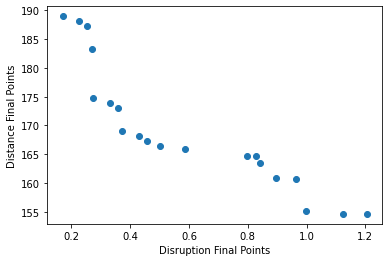

In [31]:
plt.xlabel('Disruption Final Points')
plt.ylabel('Distance Final Points')
plt.scatter(disruption_final_points, distance_final_points)

In [32]:
#Zipping solution points
non_dominated_solutions = list(zip([round(num,2) for num in disruption_final_points], [round(num,2) for num in distance_final_points]))

In [33]:
non_dominated_solutions

[(0.17, 188.95),
 (0.23, 188.18),
 (0.25, 187.24),
 (0.27, 183.23),
 (0.27, 174.68),
 (0.33, 173.91),
 (0.36, 172.97),
 (0.37, 168.96),
 (0.43, 168.19),
 (0.46, 167.25),
 (0.5, 166.47),
 (0.59, 165.96),
 (0.8, 164.68),
 (0.83, 164.67),
 (0.84, 163.42),
 (0.9, 160.76),
 (0.96, 160.63),
 (1.0, 155.04),
 (1.12, 154.63),
 (1.21, 154.6)]

## Discriminate solutions by an additive model

In [34]:
#Function to normalize data to the range [0,1]
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [35]:
#Using an additive aggregation function 
#with weights = 0.5 for both criteria Disruption and Distance
additive_values = []

for i in range(len(disruption_final_points)):
    weighted_value = 0.5*NormalizeData(disruption_final_points)[i] + 0.5*NormalizeData(distance_final_points)[i]
    additive_values.append(weighted_value)

In [36]:
#Final additive values
additive_values

[0.5,
 0.5164972255840646,
 0.5153157539527469,
 0.4648618525080611,
 0.34262799557037726,
 0.3591252211544419,
 0.35794374952312424,
 0.3074898480784384,
 0.323987073662503,
 0.32280560203118525,
 0.33206198774055085,
 0.36653434285567316,
 0.4489741426879819,
 0.4642740886034167,
 0.45317431712440404,
 0.44076087666737906,
 0.4704836121238794,
 0.4056227291754402,
 0.4604714336119342,
 0.5]

In [37]:
#Rounding values
[round(num,4) for num in additive_values]

[0.5,
 0.5165,
 0.5153,
 0.4649,
 0.3426,
 0.3591,
 0.3579,
 0.3075,
 0.324,
 0.3228,
 0.3321,
 0.3665,
 0.449,
 0.4643,
 0.4532,
 0.4408,
 0.4705,
 0.4056,
 0.4605,
 0.5]

In [38]:
#Index of the best aggregated solution
np.argmin(additive_values) 

7

In [39]:
#Best aggregated solution, disruption and distance values
non_dominated_solutions[np.argmin(additive_values)]

(0.37, 168.96)

## Printing Solution Minimum Disruption and Distance

In [129]:
#Best solution by using additive model
printsol(solution_list[np.argmin(additive_values)])

          SR1 SR2 SR3 SR4
         +---+---+---+---+
Brick 1                X 
         +---+---+---+---+
Brick 2                X 
         +---+---+---+---+
Brick 3                X 
         +---+---+---+---+
Brick 4    X             
         +---+---+---+---+
Brick 5    X             
         +---+---+---+---+
Brick 6    X             
         +---+---+---+---+
Brick 7    X             
         +---+---+---+---+
Brick 8    X             
         +---+---+---+---+
Brick 9            X     
         +---+---+---+---+
Brick 10       X         
         +---+---+---+---+
Brick 11           X     
         +---+---+---+---+
Brick 12           X     
         +---+---+---+---+
Brick 13       X         
         +---+---+---+---+
Brick 14       X         
         +---+---+---+---+
Brick 15   X             
         +---+---+---+---+
Brick 16           X     
         +---+---+---+---+
Brick 17           X     
         +---+---+---+---+
Brick 18           X     
         +---+---+--

## Printing Solution Minimum Disruption

In [130]:
printsol(solution_list[0])

          SR1 SR2 SR3 SR4
         +---+---+---+---+
Brick 1                X 
         +---+---+---+---+
Brick 2                X 
         +---+---+---+---+
Brick 3                X 
         +---+---+---+---+
Brick 4    X             
         +---+---+---+---+
Brick 5    X             
         +---+---+---+---+
Brick 6    X             
         +---+---+---+---+
Brick 7    X             
         +---+---+---+---+
Brick 8    X             
         +---+---+---+---+
Brick 9            X     
         +---+---+---+---+
Brick 10       X         
         +---+---+---+---+
Brick 11           X     
         +---+---+---+---+
Brick 12           X     
         +---+---+---+---+
Brick 13       X         
         +---+---+---+---+
Brick 14       X         
         +---+---+---+---+
Brick 15   X             
         +---+---+---+---+
Brick 16           X     
         +---+---+---+---+
Brick 17           X     
         +---+---+---+---+
Brick 18           X     
         +---+---+--

## Printing Solution Minimum Distance

In [131]:
printsol(solution_list[-1])

          SR1 SR2 SR3 SR4
         +---+---+---+---+
Brick 1                X 
         +---+---+---+---+
Brick 2                X 
         +---+---+---+---+
Brick 3                X 
         +---+---+---+---+
Brick 4    X             
         +---+---+---+---+
Brick 5    X             
         +---+---+---+---+
Brick 6    X             
         +---+---+---+---+
Brick 7    X             
         +---+---+---+---+
Brick 8    X             
         +---+---+---+---+
Brick 9    X             
         +---+---+---+---+
Brick 10           X     
         +---+---+---+---+
Brick 11       X         
         +---+---+---+---+
Brick 12   X             
         +---+---+---+---+
Brick 13       X         
         +---+---+---+---+
Brick 14       X         
         +---+---+---+---+
Brick 15           X     
         +---+---+---+---+
Brick 16           X     
         +---+---+---+---+
Brick 17           X     
         +---+---+---+---+
Brick 18       X         
         +---+---+--

## Printing Initial Solution

In [132]:
initial_state = np.array([[0],[0],[0],[1], [0],[0],[0],[1], [0],[0],[0],[1], [1],[0],[0],[0], [1],[0],[0],[0], [1],[0],[0],[0], [1],[0],[0],[0], [1],[0],[0],[0], [0],[0],[1],[0], [0],[1],[0],[0], [0],[1],[0],[0], [0],[1],[0],[0], [0],[1],[0],[0], [0],[1],[0],[0], [1],[0],[0],[0], [0],[0],[1],[0], [0],[0],[1],[0], [0],[0],[1],[0], [0],[0],[0],[1], [0],[0],[0],[1], [0],[0],[0],[1], [0],[0],[0],[1]])

In [133]:
initial_state.shape

(88, 1)

In [134]:
initial_state_matrix = matrix(initial_state)

In [135]:
initial_state_matrix

<88x1 matrix, tc='i'>

In [136]:
printsol(initial_state_matrix)

          SR1 SR2 SR3 SR4
         +---+---+---+---+
Brick 1                X 
         +---+---+---+---+
Brick 2                X 
         +---+---+---+---+
Brick 3                X 
         +---+---+---+---+
Brick 4    X             
         +---+---+---+---+
Brick 5    X             
         +---+---+---+---+
Brick 6    X             
         +---+---+---+---+
Brick 7    X             
         +---+---+---+---+
Brick 8    X             
         +---+---+---+---+
Brick 9            X     
         +---+---+---+---+
Brick 10       X         
         +---+---+---+---+
Brick 11       X         
         +---+---+---+---+
Brick 12       X         
         +---+---+---+---+
Brick 13       X         
         +---+---+---+---+
Brick 14       X         
         +---+---+---+---+
Brick 15   X             
         +---+---+---+---+
Brick 16           X     
         +---+---+---+---+
Brick 17           X     
         +---+---+---+---+
Brick 18           X     
         +---+---+--